# Experiment 2

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



def f_df(path, method):
    abc = pd.read_pickle(path, compression='gzip')
    abc = abc.explode('tensor')
    abc[['method', 'tensor', 'token_next']] = abc['tensor'].to_list()
    abc = abc[abc['method'] == method].copy()
    abc['predicted_token_dist_from_start'] = abc[['tensor', 'token_next']].apply(lambda x : list(range(x['token_next'], x['token_next'] + len(x['tensor']))), axis=1)
    abc = abc.explode(column=['tensor', 'predicted_token_dist_from_start'])
    
    abc['first_token'] = abc.apply(lambda x : x['ignore'][x['first_token']]-1, axis=1)
    abc['second_token'] = abc.apply(lambda x : x['ignore'][x['second_token']]-1, axis=1)
    
    abc = abc[abc['first_token']!= abc['predicted_token_dist_from_start']]
    abc = abc[abc['second_token']!= abc['predicted_token_dist_from_start']]
    
    
    abc = abc[abc['first_token'] != abc['second_token']].copy()
    abc['tensor'] = abc['tensor'].apply(lambda x : float(x))
    abc = abc.reset_index(drop=True)
    abc['max_token'] = abc[['first_token', 'second_token']].max(axis=1)
    abc['min_dist'] = abc['predicted_token_dist_from_start'] - abc['max_token']
    abc['rem'] = abc.groupby(['posdis','min_dist'])['row_number'].transform(lambda x : x.count())
    return abc

def f_avg_df(path, method):
    import pickle
    abc = pickle.load(open(path,'rb'))
    abc = pd.DataFrame(abc, columns = ['tensor', 'posdis', 'row_number', 'first_token', 'second_token'])
    abc = abc[abc['posdis']<=7].copy()
    abc = abc.explode('tensor')
    abc[['method', 'tensor', 'token_next']] = abc['tensor'].to_list()
    abc = abc[abc['method'] == method].copy()
    abc['predicted_token_dist_from_start'] = abc[['tensor', 'token_next']].apply(lambda x : list(range(x['token_next'], x['token_next'] + len(x['tensor']))), axis=1)
    abc = abc.explode(column=['tensor', 'predicted_token_dist_from_start'])
    abc = abc[abc['first_token']!= abc['predicted_token_dist_from_start']]
    abc = abc[abc['second_token']!= abc['predicted_token_dist_from_start']]
    abc = abc[abc['first_token'] != abc['second_token']].copy()
    abc['tensor'] = abc['tensor'].apply(lambda x : float(x))
    abc = abc.reset_index(drop=True)
    abc['max_token'] = abc[['first_token', 'second_token']].max(axis=1)
    abc['min_dist'] = abc['predicted_token_dist_from_start'] - abc['max_token']
    abc['rem'] = abc.groupby(['posdis','min_dist'])['row_number'].transform(lambda x : x.count())
    return abc

def plot(strong_df, weak_df, avg_df):
    fig, axes = plt.subplots(1, 6, figsize=(15, 3), sharey=True, sharex=True)
    strong_df = strong_df.rename(columns = {'posdis': f'$d_i$', 'tensor': 'STII'})
    weak_df = weak_df.rename(columns = {'posdis': f'$d_i$', 'tensor': 'STII'})
    avg_df = avg_df.rename(columns = {'posdis': f'$d_i$', 'tensor': 'STII'})

    strong_df = strong_df[strong_df[f'$d_i$'] <= 4]
    weak_df = weak_df[weak_df[f'$d_i$'] <= 4]
    avg_df = avg_df[avg_df[f'$d_i$'] <= 4]

    for i in range(0, 6):
        for j in [0]:
            min_dist = j*4 + i + 1
            
            strong_line = sns.lineplot(data=strong_df[strong_df['min_dist'] ==min_dist], x=f'$d_i$', y="STII", ax=axes[i], label='strong mwe')
            weak_line = sns.lineplot(data=weak_df[weak_df['min_dist'] ==min_dist], x=f'$d_i$', y="STII", ax=axes[i], label='weak mwe')
            avg_line = sns.lineplot(data=avg_df[avg_df['min_dist'] == min_dist], x=f'$d_i$', y="STII", ax=axes[i], label='avg')
            axes[i].set_title(f'$d_p$ = {min_dist}')
            # if i != 2:
            # axes[i].set_xlabel(f'$d_i$', labelpad=-5)
            handles, labels = axes[i].get_legend_handles_labels()
            axes[i].get_legend().remove()
    # plt.legend()
    plt.subplots_adjust(bottom=0.5)
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=3)
    plt.tight_layout()
    plt.savefig('llm_experiment1-7.png', bbox_inches='tight')
    plt.show()


In [109]:
version = '100_softmax'
load_avg = True
method = 1


In [110]:

weak_path = f'weak_mwe_gpt{version}.pkl'
weak_df = f_df(weak_path, method).drop(columns = ['ignore'])
weak_df = weak_df[weak_df['rem'] >= 50].copy()
display(weak_df)

/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,tensor,posdis,row_number,first_token,second_token,method,token_next,predicted_token_dist_from_start,max_token,min_dist,rem
0,1.035831,1,2,24,23,1,25,25,24,1,112781.0
1,1.015264,1,2,24,23,1,25,26,24,2,112574.0
2,0.990079,1,2,24,23,1,25,27,24,3,111813.0
3,0.836391,1,2,24,23,1,25,28,24,4,110268.0
4,0.345599,1,2,24,23,1,25,29,24,5,107987.0
...,...,...,...,...,...,...,...,...,...,...,...
2748760,0.689440,1,104014,4,3,1,5,5,4,1,112781.0
2748761,0.857080,1,104014,4,3,1,5,6,4,2,112574.0
2748762,0.454619,1,104014,4,3,1,5,7,4,3,111813.0
2748763,0.227409,1,104014,4,3,1,5,8,4,4,110268.0


In [ ]:
if load_avg:
    strong_path = f'strong_mwe_gpt{version}.pkl'
    strong_df = f_df(strong_path, method).drop(columns = ['ignore'])
    strong_df = strong_df[strong_df['rem'] >= 50].copy()
    display(strong_df)
    
    avg_df = f_avg_df(f'avg_gpt{version}.pkl', method)
    avg_df = avg_df[avg_df['rem'] >= 50].copy()
    display(avg_df)

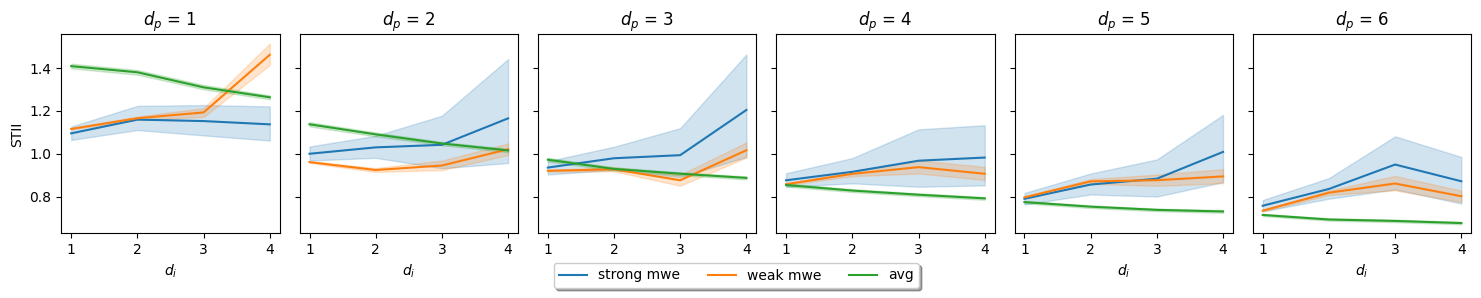

In [64]:
if load_avg:
    plot(strong_df, weak_df, avg_df)

    # del strong_df, weak_df, avg_df
    

In [6]:
avg_df

,tensor,posdis,row_number,first_token,second_token,method,token_next,predicted_token_dist_from_start,max_token,min_dist,rem
0,0.598986,1,2,1,2,1,3,3,2,1,48174.0
1,1.338643,1,2,1,2,1,3,4,2,2,48172.0
2,1.713862,1,2,1,2,1,3,5,2,3,48165.0
3,0.760269,1,2,1,2,1,3,6,2,4,48136.0
4,0.681619,1,2,1,2,1,3,7,2,5,48077.0
...,...,...,...,...,...,...,...,...,...,...,...
7649563,0.008604,7,104000,7,14,1,15,33,14,19,26385.0
7649564,0.002336,7,104000,7,14,1,15,34,14,20,25005.0
7649565,0.418010,7,104000,7,14,1,15,35,14,21,23602.0
7649566,0.484936,7,104000,7,14,1,15,36,14,22,21771.0


In [111]:
# Remove tokens which are part of same words. 
# 
import pandas as pd
ap = []
for i in [0, 1, 2, 3]:
    print(i)
    abc = pd.read_pickle(f'../mwe_tagger/gpt_gpt.pkl_{i}').drop(columns = ['sentence', 'd', 'toks', 'tags', '_', '~', 'lemmas', 'tokens', 'sent',
       'syntactic_distance_idx', 'tokens_to_map', 'token_map', 'token_map_dict', 'weak_mwe', 'strong_mwe'])
    def foo(x):
        g = {}
        for tup, val in x.items():
            if len(tup) == 2: 
                for a in tup[0]:
                    for b in tup[1]:
                        g[(a, b)] = val
        return g
    abc['syntactic_distance_idx_mapped'] = abc['syntactic_distance_idx_mapped'].apply(foo)
    ab = abc.reset_index().rename(columns = {'index':'row_number'})
    ap.append(weak_df.merge(ab[['row_number', 'syntactic_distance_idx_mapped']], on = ['row_number']))


ap = pd.concat(ap)
ap['syntactic_distance_idx_mapped'] = ap[['syntactic_distance_idx_mapped', 'first_token', 'second_token']].apply(lambda x : x['syntactic_distance_idx_mapped'].get((x['first_token'], x['second_token']), -100), axis=1)

0
1
2
3


/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


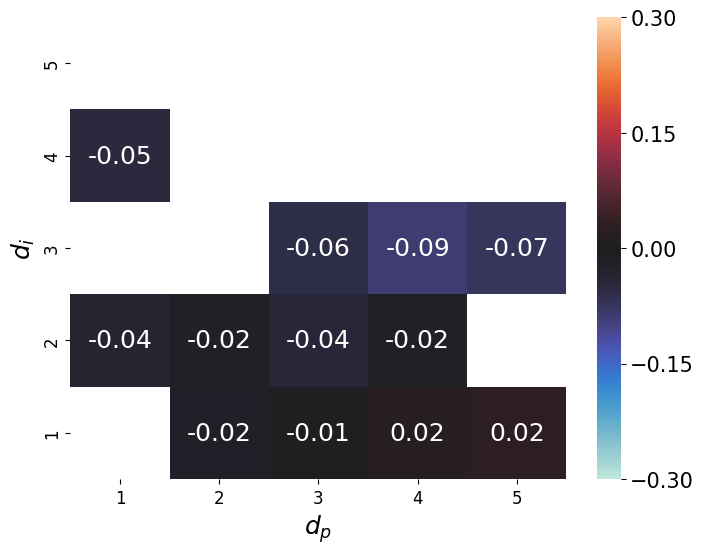

In [112]:
import numpy as np
zp = ap.copy()
zp['ct'] = zp.groupby(['posdis', 'min_dist', 'syntactic_distance_idx_mapped'])['tensor'].transform(lambda x : x.count())
zp = zp[zp['ct']>50]
zp = zp[zp['syntactic_distance_idx_mapped']>0]
zp = zp[zp['syntactic_distance_idx_mapped']<=6]
zp['diff_syn'] = zp.groupby(['posdis', 'min_dist'])['syntactic_distance_idx_mapped'].transform(lambda x : x.min())
zp = zp[zp['diff_syn']==1]
# zp['diff_syn'] = zp.groupby(['posdis', 'min_dist'])['syntactic_distance_idx_mapped'].transform(lambda x : x.nunique())
# zp = zp[zp['diff_syn']>=3]



from scipy.stats import pearsonr, spearmanr
# z = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: pearsonr(x, y)[0])
# y = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: pearsonr(x, y)[1])

z = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[0])
y = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[1])


y = y['syntactic_distance_idx_mapped'].reset_index()
y = y[y['level_2'] == 'tensor']
mask_apq = y[y['min_dist'].abs()<=5].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
mask_apq.columns = [x[1] for x in mask_apq.columns]
mask_apq = mask_apq[::-1]
mask_apq = np.where(mask_apq > 0.05, np.nan, 1)


z = z['syntactic_distance_idx_mapped'].reset_index()
z = z[z['level_2'] == 'tensor']
apq = z[z['min_dist'].abs()<=5].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
apq.columns = [x[1] for x in apq.columns]
apq = apq[::-1]
apq = apq * mask_apq


plt.figure(figsize=(8,6))

# ax = sns.heatmap(apq, annot=True, center=0, vmin= -0.2, vmax=0.1, fmt=".2f", annot_kws={"size": 18})#,  cbar_kws={"ticks": 5})
ax = sns.heatmap(apq, annot=True, center=0, vmin=-0.3, vmax=0.3, fmt=".2f", annot_kws={"size": 18},  cbar_kws={"ticks": [-0.3, -0.15, 0, 0.15, 0.3]})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

plt.xlabel('$d_p$', fontsize = 18) # x-axis label with fontsize 15
plt.ylabel('$d_i$', fontsize = 18) # y-axis label with fontsize 15

plt.show()

In [113]:
ax.get_figure().savefig('alm_experiment2-8.png', bbox_inches='tight')

# Experiment 3

In [96]:
def plot_mlm(strong_df, weak_df, avg_df):
    # fig, axes = plt.subplots(4, 4, figsize=(30,20))
    
    # for i in range(0, 4):
    #     for j in range(4):
    #         min_dist = j*4 + i + 1 - 8
            
            
    #         strong_line = sns.lineplot(data=strong_df[strong_df['min_dist'] ==min_dist], x="posdis", y="tensor", ax=axes[j][i], label='strong')
    #         weak_line = sns.lineplot(data=weak_df[weak_df['min_dist'] ==min_dist], x="posdis", y="tensor", ax=axes[j][i], label='weak')
    #         avg_line = sns.lineplot(data=avg_df[avg_df['min_dist'] == min_dist], x="posdis", y="tensor", ax=axes[j][i], label='avg')
    
    #         # axes[j][i].set_title('Comparison of strong vs avg vs weak mwe over fixed positional distances')
            
    #         axes[j][i].set_title(f'$t_{{target}} - t_2$ = {min_dist}')
    #         axes[j][i].legend()
    # plt.show()        

    fig, axes = plt.subplots(1, 6, figsize=(15, 3), sharey=True, sharex=True)
    strong_df = strong_df.rename(columns = {'posdis': f'$d_i$', 'tensor': 'STII'})
    weak_df = weak_df.rename(columns = {'posdis': f'$d_i$', 'tensor': 'STII'})
    avg_df = avg_df.rename(columns = {'posdis': f'$d_i$', 'tensor': 'STII'})

    strong_df = strong_df[strong_df[f'$d_i$'] <= 4]
    weak_df = weak_df[weak_df[f'$d_i$'] <= 4]
    avg_df = avg_df[avg_df[f'$d_i$'] <= 4]

    for i in range(0, 6):
        for j in [0]:
            min_dist = j*4 + i + 1
            
            strong_line = sns.lineplot(data=strong_df[strong_df['min_dist'] ==min_dist], x=f'$d_i$', y="STII", ax=axes[i], label='strong mwe')
            weak_line = sns.lineplot(data=weak_df[weak_df['min_dist'] ==min_dist], x=f'$d_i$', y="STII", ax=axes[i], label='weak mwe')
            avg_line = sns.lineplot(data=avg_df[avg_df['min_dist'] == min_dist], x=f'$d_i$', y="STII", ax=axes[i], label='avg')
            axes[i].set_title(f'$d_p$ = {min_dist}')
            # if i != 2:
            # axes[i].set_xlabel(f'$d_i$', labelpad=-5)
            handles, labels = axes[i].get_legend_handles_labels()
            axes[i].get_legend().remove()
    # plt.legend()
    plt.subplots_adjust(bottom=0.5)
    fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=3)
    plt.tight_layout()
    plt.savefig('mlm_experiment1-7.png', bbox_inches='tight')
    plt.show()

In [97]:
# version = 10000
# load_avg = True
# method = 1
# model = 'bert'

version = '10000'
load_avg = True
method = 1
model = 'bert'

weak_path = f'weak_mwe_{model}{version}.pkl'
weak_df = f_df(weak_path, method).drop(columns = ['ignore'])
weak_df = weak_df[weak_df['rem'] >= 50].copy()
display(weak_df)

/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


,tensor,posdis,row_number,first_token,second_token,method,token_next,predicted_token_dist_from_start,max_token,min_dist,rem
0,0.087059,1,2,30,29,1,0,0,30,-30,19022
1,0.518814,1,2,30,29,1,0,1,30,-29,21043
2,0.337648,1,2,30,29,1,0,2,30,-28,23124
3,0.001986,1,2,30,29,1,0,3,30,-27,25317
4,0.001548,1,2,30,29,1,0,4,30,-26,27643
...,...,...,...,...,...,...,...,...,...,...,...
6344319,0.127917,1,104014,4,3,1,0,6,4,2,127574
6344320,0.000292,1,104014,4,3,1,0,7,4,3,127124
6344321,0.000131,1,104014,4,3,1,0,8,4,4,126505
6344322,0.009992,1,104014,4,3,1,0,9,4,5,122489


In [ ]:
if load_avg:
    strong_path = f'strong_mwe_{model}{version}.pkl'
    strong_df = f_df(strong_path, method).drop(columns = ['ignore'])
    strong_df = strong_df[strong_df['rem'] >= 50].copy()
    display(strong_df)
    
    avg_df = f_avg_df(f'avg_{model}{version}.pkl', method)
    avg_df = avg_df[avg_df['rem'] >= 50].copy()
    display(avg_df)

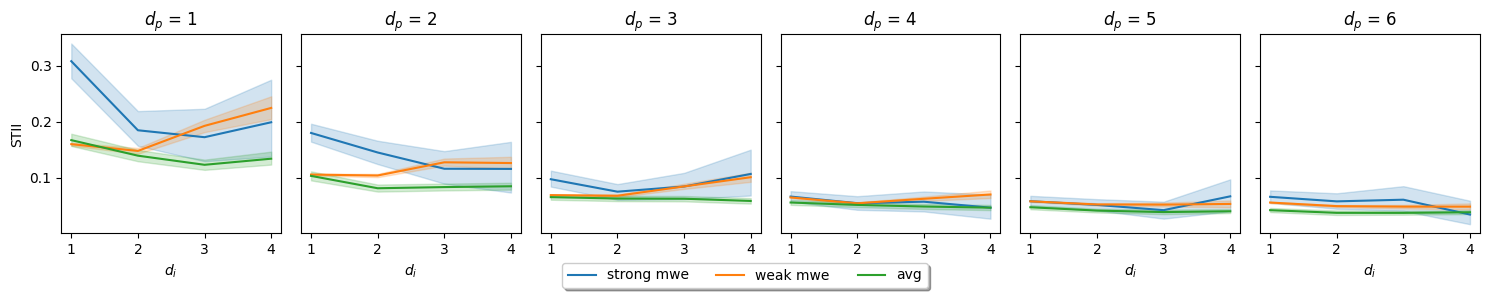

In [58]:
if load_avg:
    plot_mlm(strong_df, weak_df, avg_df)
    # del strong_df, weak_df, avg_df

In [98]:
import pandas as pd
ap = []
for i in [0, 1, 2, 3]:
    print(i)
    abc = pd.read_pickle(f'../mwe_tagger/bert_bert.pkl_{i}')
    ab = abc.reset_index().rename(columns = {'index':'row_number'})
    ap.append(weak_df.merge(ab[['row_number', 'syntactic_distance_idx_mapped']], on = ['row_number']))

ap = pd.concat(ap)
ap['syntactic_distance_idx_mapped'] = ap[['syntactic_distance_idx_mapped', 'first_token', 'second_token']].apply(lambda x : x['syntactic_distance_idx_mapped'].get((x['first_token'], x['second_token']), -100), axis=1)

0
1
2
3


In [99]:
# import numpy as np
# zp = ap.copy()
# zp['ct'] = zp.groupby(['posdis', 'min_dist', 'syntactic_distance_idx_mapped'])['tensor'].transform(lambda x : x.count())
# zp = zp[zp['ct']>50]
# # zp = zp[zp['syntactic_distance_idx_mapped']>0]
# zp = zp[zp['syntactic_distance_idx_mapped']>=0]
# zp = zp[zp['syntactic_distance_idx_mapped']<=6]
# zp['diff_syn'] = zp.groupby(['posdis', 'min_dist'])['syntactic_distance_idx_mapped'].transform(lambda x : x.min())
# # zp = zp[zp['diff_syn']==1]
# # zp['diff_syn'] = zp.groupby(['posdis', 'min_dist'])['syntactic_distance_idx_mapped'].transform(lambda x : x.nunique())
# # zp = zp[zp['diff_syn']>=3]



# from scipy.stats import pearsonr, spearmanr
# # z = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: pearsonr(x, y)[0])
# # y = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: pearsonr(x, y)[1])

# z = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[0])
# y = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[1])


# y = y['syntactic_distance_idx_mapped'].reset_index()
# y = y[y['level_2'] == 'tensor']
# mask_apq = y[y['min_dist'].abs()<=6].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
# mask_apq.columns = [x[1] for x in mask_apq.columns]
# mask_apq = mask_apq[::-1]
# mask_apq = np.where(mask_apq > 0.05, np.nan, 1)
# # mask_apq = np.where(mask_apq > 0.05, 1, 1)


# z = z['syntactic_distance_idx_mapped'].reset_index()
# z = z[z['level_2'] == 'tensor']
# apq = z[z['min_dist'].abs()<=6].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
# apq.columns = [x[1] for x in apq.columns]
# apq = apq[::-1]
# apq = apq * mask_apq


# plt.figure(figsize=(10,8))

# ax = sns.heatmap(apq, annot=True, center=0, vmin= -0.2, vmax=0.2)
# plt.xlabel('$t_{target} - t_2$', fontsize = 15) # x-axis label with fontsize 15
# plt.ylabel('$t_1 - t_2$', fontsize = 12) # y-axis label with fontsize 15

# plt.show()

/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


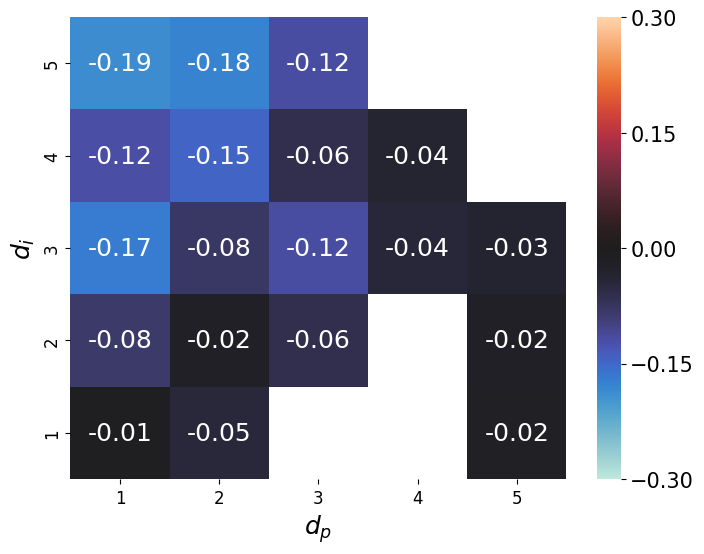

In [107]:
import numpy as np
zp = ap.copy()
zp['ct'] = zp.groupby(['posdis', 'min_dist', 'syntactic_distance_idx_mapped'])['tensor'].transform(lambda x : x.count())
zp = zp[zp['ct']>100]
# zp = zp[zp['syntactic_distance_idx_mapped']>0]
zp = zp[zp['syntactic_distance_idx_mapped']>0]
zp = zp[zp['syntactic_distance_idx_mapped']<=5]
zp['diff_syn'] = zp.groupby(['posdis', 'min_dist'])['syntactic_distance_idx_mapped'].transform(lambda x : x.min())
zp = zp[zp['diff_syn']==1]

# zp['diff_syn'] = zp.groupby(['posdis', 'min_dist'])['syntactic_distance_idx_mapped'].transform(lambda x : x.nunique())
# zp = zp[zp['diff_syn']>=3]



from scipy.stats import pearsonr, spearmanr
# z = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: pearsonr(x, y)[0])
# y = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: pearsonr(x, y)[1])


z = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[0])
y = zp.groupby(['posdis', 'min_dist'])[['tensor','syntactic_distance_idx_mapped']].corr(method=lambda x, y: spearmanr(x, y)[1])


y = y['syntactic_distance_idx_mapped'].reset_index()
y = y[y['level_2'] == 'tensor']
y = y[y['posdis'] <= 5]
mask_apq = y[(y['min_dist'].abs()<=5) & (y['min_dist'] > 0)].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
mask_apq.columns = [x[1] for x in mask_apq.columns]
mask_apq = mask_apq[::-1]
mask_apq = np.where(mask_apq > 0.05, np.nan, 1)
# mask_apq = np.where(mask_apq > 0.05, 1, 1)


z = z['syntactic_distance_idx_mapped'].reset_index()
z = z[z['level_2'] == 'tensor']
z = z[z['posdis'] <= 5]

apq = z[(z['min_dist'].abs()<=5) & (y['min_dist'] > 0)].drop(columns = ['level_2']).set_index([ 'posdis', 'min_dist']).unstack()
apq.columns = [x[1] for x in apq.columns]
apq = apq[::-1]
apq = apq * mask_apq


plt.figure(figsize=(8,6))

ax = sns.heatmap(apq, annot=True, center=0, vmin=-0.3, vmax=0.3, fmt=".2f", annot_kws={"size": 18},  cbar_kws={"ticks": [-0.3, -0.15, 0, 0.15, 0.3] })
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.xlabel('$d_p$', fontsize = 18) # x-axis label with fontsize 15
plt.ylabel('$d_i$', fontsize = 18) # y-axis label with fontsize 15

plt.show()

In [108]:
ax.get_figure().savefig('mlm_experiment2-8.png', bbox_inches='tight')

<Axes: xlabel='posdis'>

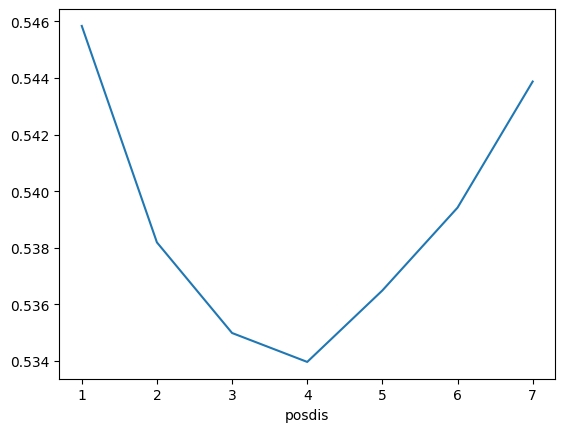

In [24]:
avg_df.groupby('posdis')['tensor'].mean().plot()

In [1]:
avg_df_gpt = pd.read_pickle()

NameError: name 'pd' is not defined

In [66]:
method = 1

In [67]:
avg_df = f_avg_df('avg_bert100.pkl', method)
avg_df = avg_df[avg_df['min_dist']>0].copy()
avg_df = avg_df[avg_df['min_dist']<=7]

/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


In [79]:
avg_gpt_df = f_avg_df('avg_gpt100.pkl', method)

/home/dsinghvi/miniconda3/envs/py38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim


In [80]:
avg_gpt_df = avg_gpt_df[(avg_gpt_df['min_dist']>=0) & (avg_gpt_df['min_dist']<=7)]


In [70]:
# avg_df[avg_df['rem'] >= 50]

In [71]:
avg_bert_df = avg_df

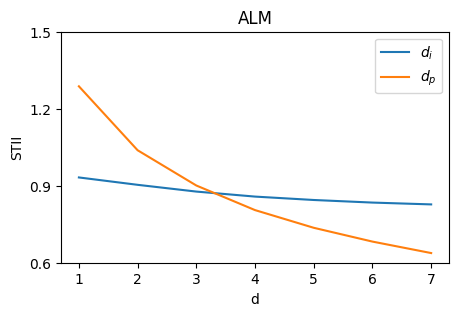

In [36]:
posdis_means= avg_gpt_df.groupby('posdis')['tensor'].mean()
min_dist_means = avg_gpt_df.groupby('min_dist')['tensor'].mean()

plt.figure(figsize=(5, 3))
plt.plot(posdis_means, label='$d_{i}$')
plt.plot(min_dist_means, label='$d_{p}$')

# Add labels and legend
plt.xlabel('d')
plt.ylabel('STII')
plt.title('ALM')
plt.yticks([0.6, 0.9, 1.2, 1.5])  # Adjust the range if needed
# plt.yticks([0.7, 0.9, 1.1, 1.3])  # Adjust the range if needed
plt.legend()
plt.savefig('alm_avg_experiment2.png', bbox_inches='tight')


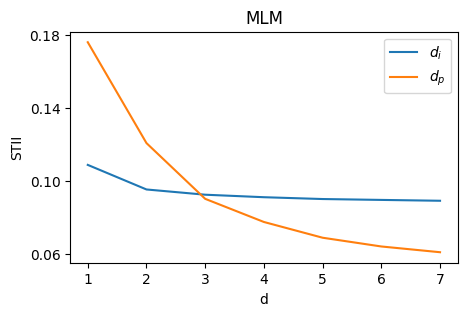

In [35]:
posdis_means = avg_bert_df.groupby('posdis')['tensor'].mean()
min_dist_means = avg_bert_df.groupby('min_dist')['tensor'].mean()

plt.figure(figsize=(5, 3))

plt.plot(posdis_means, label='$d_{i}$')
plt.plot(min_dist_means, label='$d_{p}$')

# Add labels and legend
plt.xlabel('d')
plt.ylabel('STII')
plt.yticks([0.06, 0.10, 0.14, 0.18])  # Adjust the range if needed
plt.title('MLM')
plt.legend()
plt.savefig('mlm_avg_experiment2.png', bbox_inches='tight')


In [85]:
real_avg_gpt_df = avg_gpt_df.copy()
real_avg_bert_df = avg_bert_df.copy()

In [89]:
avg_gpt_df = real_avg_gpt_df.copy()
avg_bert_df = real_avg_bert_df.copy()

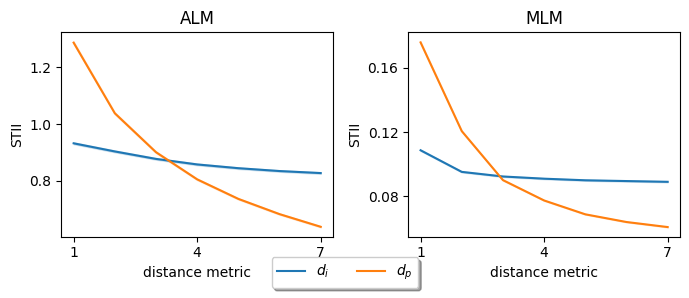

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3),  sharex=True)

avg_gpt_df = avg_gpt_df.rename(columns = {'posdis': f'$d_i$', 'min_dist' : f'$d_p$', 'tensor': 'STII'})
avg_bert_df = avg_bert_df.rename(columns = {'posdis': f'$d_i$', 'min_dist' : f'$d_p$', 'tensor': 'STII'})
# avg_gpt_df = avg_gpt_df[avg_gpt_df[f'$d_i$'] == 1]
# avg_bert_df = avg_bert_df[avg_bert_df[f'$d_i$'] == 1]
# avg_gpt_df = avg_gpt_df[avg_gpt_df[f'$d_p$'] == 1]
# avg_bert_df = avg_bert_df[avg_bert_df[f'$d_i$'] == 1]

strong_line = sns.lineplot(data=avg_gpt_df, x=f'$d_i$', y="STII", ax=axes[0], label=f'$d_i$')
weak_line = sns.lineplot(data=avg_gpt_df, x=f'$d_p$', y="STII", ax=axes[0], label=f'$d_p$')
axes[0].set_title(f'ALM')
axes[0].set_xlabel('distance metric')
handles, labels = axes[0].get_legend_handles_labels()
axes[0].get_legend().remove()
axes[0].set_xticks([1, 4, 7])


strong_line = sns.lineplot(data=avg_bert_df, x=f'$d_i$', y="STII", ax=axes[1], label=f'$d_i$')
weak_line = sns.lineplot(data=avg_bert_df, x=f'$d_p$', y="STII", ax=axes[1], label=f'$d_p$')
axes[1].set_title(f'MLM')
handles, labels = axes[1].get_legend_handles_labels()
axes[1].set_xlabel('distance metric')
axes[1].get_legend().remove()
axes[1].set_yticks([0.08, 0.12, 0.16])
axes[1].set_xticks([1, 4, 7])


plt.subplots_adjust(bottom=0.5)
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0), fancybox=True, shadow=True, ncol=3)
plt.tight_layout()
plt.savefig('mlm_avg_experiment2.png', bbox_inches='tight')
plt.show()